Fetching symbols for S&P 500 (^GSPC)
Fetching symbols for Dow Jones (^DJI)
Fetching symbols for Nasdaq 100 (^NDX)
Stock Symbols List:
[]


[*********************100%***********************]  1 of 1 completed


Polynomial Regression Mean Squared Error: 45.72926239649243


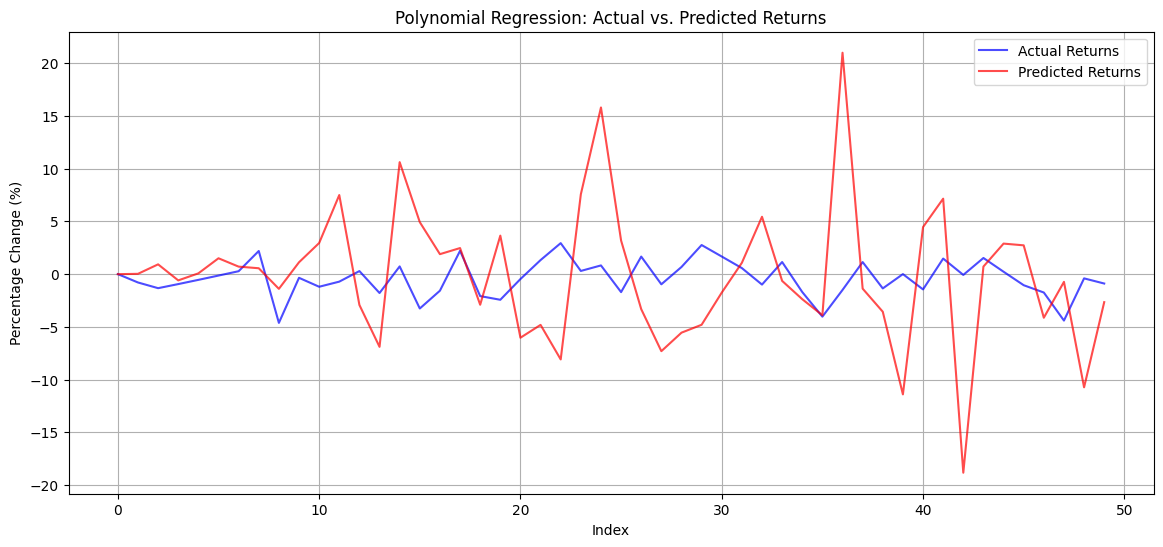

In [8]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


data = yf.download('F', start='2010-07-20', end='2011-08-01')


prices = data['Close']
percentage_changes = prices.pct_change().dropna() * 100

def create_features(prices, window_size):
    X, y = [], []
    for i in range(window_size, len(prices)):
        X.append(prices[i - window_size:i])
        y.append(prices[i])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_features(percentage_changes.values, window_size)


poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


split = int(0.8 * len(X))
X_train, X_test = X_poly[:split], X_poly[split:]
y_train, y_test = y[:split], y[split:]

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f'Polynomial Regression Mean Squared Error: {mse}')

# Plot actual vs. predicted returns
plt.figure(figsize=(14, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Returns', color='blue', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Returns', color='red', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Percentage Change (%)')
plt.title('Polynomial Regression: Actual vs. Predicted Returns')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-12-ba727e86e62d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Returns'] = data['Close'].pct_change().dropna() * 100  # Calculate percentage change for returns


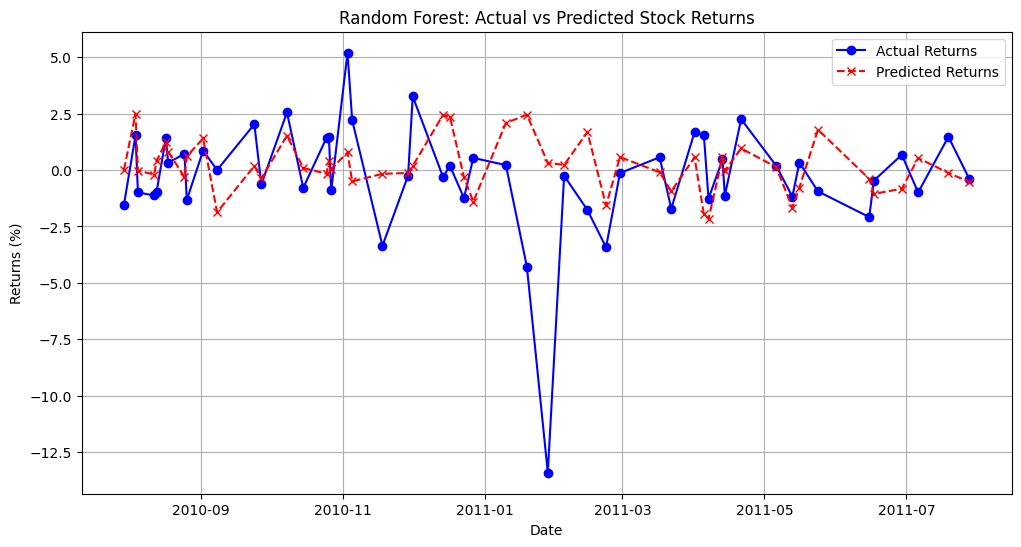

[*********************100%***********************]  1 of 1 completed
<ipython-input-12-ba727e86e62d>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Returns'] = data['Close'].pct_change().dropna() * 100
[*********************100%***********************]  1 of 1 completed
<ipython-input-12-ba727e86e62d>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['Returns'] = future_data['Close'].pct_change().dropna() * 100


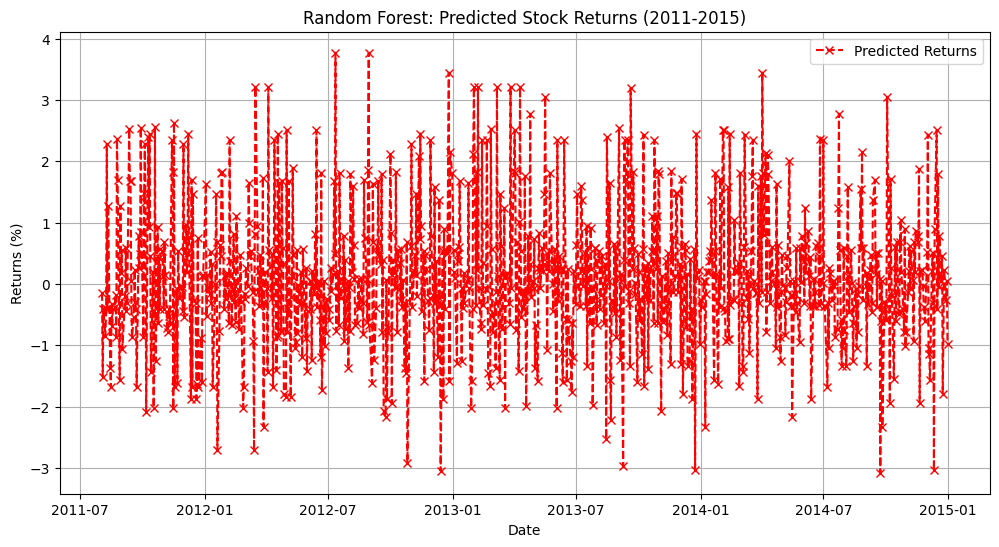

In [12]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


data = yf.download('F', start='2010-07-20', end='2011-08-01')
data = data[['Close']]
data['Returns'] = data['Close'].pct_change().dropna() * 100


data = data.dropna()


X = data['Returns'].values[:-1].reshape(-1, 1)
y = data['Returns'].values[1:]


dates = data.index[1:]  # Shifted index to align with y


X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)


results = pd.DataFrame({'Date': dates_test, 'Actual Returns': y_test, 'Predicted Returns': predictions})
results = results.sort_values(by='Date')  # Sort by date


plt.figure(figsize=(12, 6))
plt.plot(results['Date'], results['Actual Returns'], label='Actual Returns', color='blue', marker='o')
plt.plot(results['Date'], results['Predicted Returns'], label='Predicted Returns', color='red', linestyle='--', marker='x')
plt.title('Random Forest: Actual vs Predicted Stock Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid(True)
plt.show()

import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib


data = yf.download('F', start='2010-07-20', end='2011-08-01')
data = data[['Close']]
data['Returns'] = data['Close'].pct_change().dropna() * 100
data = data.dropna()

X = data['Returns'].values[:-1].reshape(-1, 1)
y = data['Returns'].values[1:]
dates = data.index[1:]

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'random_forest_model.pkl')


future_data = yf.download('F', start='2011-08-01', end='2015-01-01')
future_data = future_data[['Close']]
future_data['Returns'] = future_data['Close'].pct_change().dropna() * 100
future_data = future_data.dropna()

X_future = future_data['Returns'].values[:-1].reshape(-1, 1)
dates_future = future_data.index[1:]


loaded_model = joblib.load('random_forest_model.pkl')
predictions_future = loaded_model.predict(X_future)


future_results = pd.DataFrame({'Date': dates_future, 'Predicted Returns': predictions_future})
future_results = future_results.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.plot(future_results['Date'], future_results['Predicted Returns'], label='Predicted Returns', color='red', linestyle='--', marker='x')
plt.title('Random Forest: Predicted Stock Returns (2011-2015)')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-14-cc9678f634ab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Returns'] = data['Close'].pct_change().dropna() * 100
[*********************100%***********************]  1 of 1 completed
<ipython-input-14-cc9678f634ab>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['Returns'] = future_data['Close'].pct_change().dropna() * 100


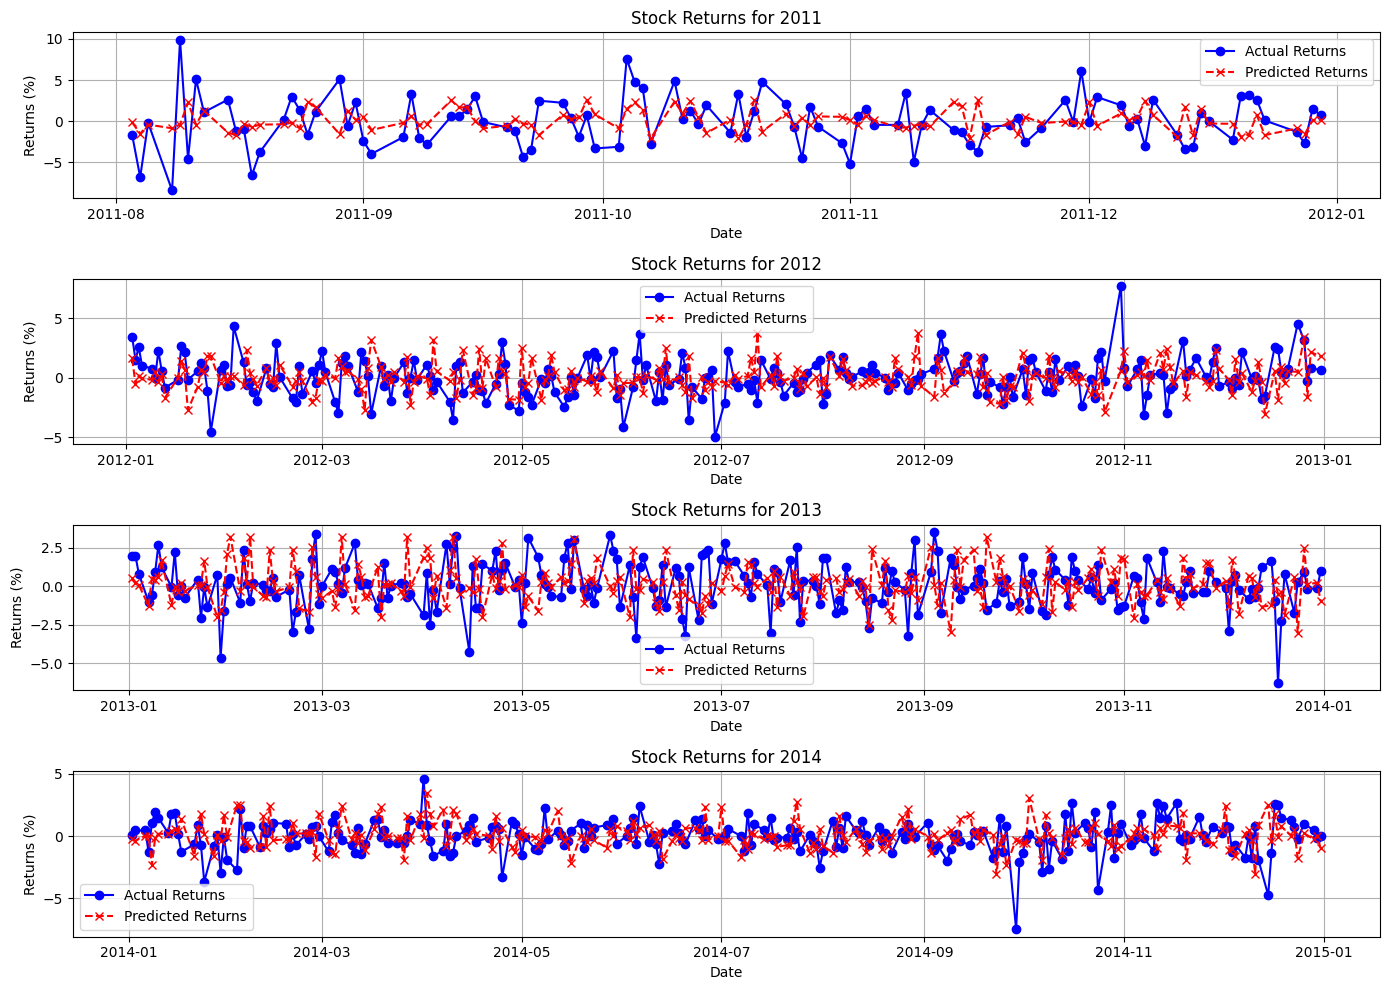

In [14]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib


data = yf.download('F', start='2010-07-20', end='2011-08-01')
data = data[['Close']]
data['Returns'] = data['Close'].pct_change().dropna() * 100
data = data.dropna()

X = data['Returns'].values[:-1].reshape(-1, 1)
y = data['Returns'].values[1:]
dates = data.index[1:]

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


joblib.dump(model, 'random_forest_model.pkl')


future_data = yf.download('F', start='2011-08-01', end='2015-01-01')
future_data = future_data[['Close']]
future_data['Returns'] = future_data['Close'].pct_change().dropna() * 100
future_data = future_data.dropna()

X_future = future_data['Returns'].values[:-1].reshape(-1, 1)
y_future = future_data['Returns'].values[1:]
dates_future = future_data.index[1:]


loaded_model = joblib.load('random_forest_model.pkl')
predictions_future = loaded_model.predict(X_future)


future_results = pd.DataFrame({
    'Date': dates_future,
    'Actual Returns': y_future,
    'Predicted Returns': predictions_future
})
future_results = future_results.sort_values(by='Date')

plt.figure(figsize=(14, 10))
years = future_results['Date'].dt.year.unique()  # Extract unique years

for i, year in enumerate(years):
    plt.subplot(len(years), 1, i + 1)
    yearly_data = future_results[future_results['Date'].dt.year == year]  # Filter data by year

    plt.plot(yearly_data['Date'], yearly_data['Actual Returns'], label='Actual Returns', color='blue', marker='o')
    plt.plot(yearly_data['Date'], yearly_data['Predicted Returns'], label='Predicted Returns', color='red', linestyle='--', marker='x')

    plt.title(f'Stock Returns for {year}')
    plt.xlabel('Date')
    plt.ylabel('Returns (%)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-15-870e0f46866f>:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '916.590296962473' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  simulation_results.at[simulation_results.index[i], 'Position'] = position
<ipython-input-15-870e0f46866f>:65: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-35829.51484812369' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  simulation_results.at[simulation_results.index[i], 'Portfolio Value'] = portfolio_value
<ipython-input-15-870e0f46866f>:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '9541.704851518763' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  simulation_results.at[simulation_results.index[i], '

Buy Signal: Bought shares at 10.90999984741211 on 2011-08-10 00:00:00
Sell Signal: Sold shares at 10.40999984741211 on 2011-08-11 00:00:00
Buy Signal: Bought shares at 10.9399995803833 on 2011-08-12 00:00:00
Sell Signal: Sold shares at 11.0600004196167 on 2011-08-15 00:00:00
Buy Signal: Bought shares at 10.449999809265137 on 2011-08-25 00:00:00
Sell Signal: Sold shares at 10.399999618530273 on 2011-08-29 00:00:00
Buy Signal: Bought shares at 10.930000305175781 on 2011-08-30 00:00:00
Sell Signal: Sold shares at 10.850000381469727 on 2011-09-02 00:00:00
Buy Signal: Bought shares at 10.220000267028809 on 2011-09-07 00:00:00
Sell Signal: Sold shares at 10.5600004196167 on 2011-09-08 00:00:00
Buy Signal: Bought shares at 10.050000190734863 on 2011-09-12 00:00:00
Sell Signal: Sold shares at 10.630000114440918 on 2011-09-16 00:00:00
Buy Signal: Bought shares at 10.539999961853027 on 2011-09-20 00:00:00
Sell Signal: Sold shares at 10.420000076293945 on 2011-09-21 00:00:00
Buy Signal: Bought sh

Text(0.5, 0, 'Date')

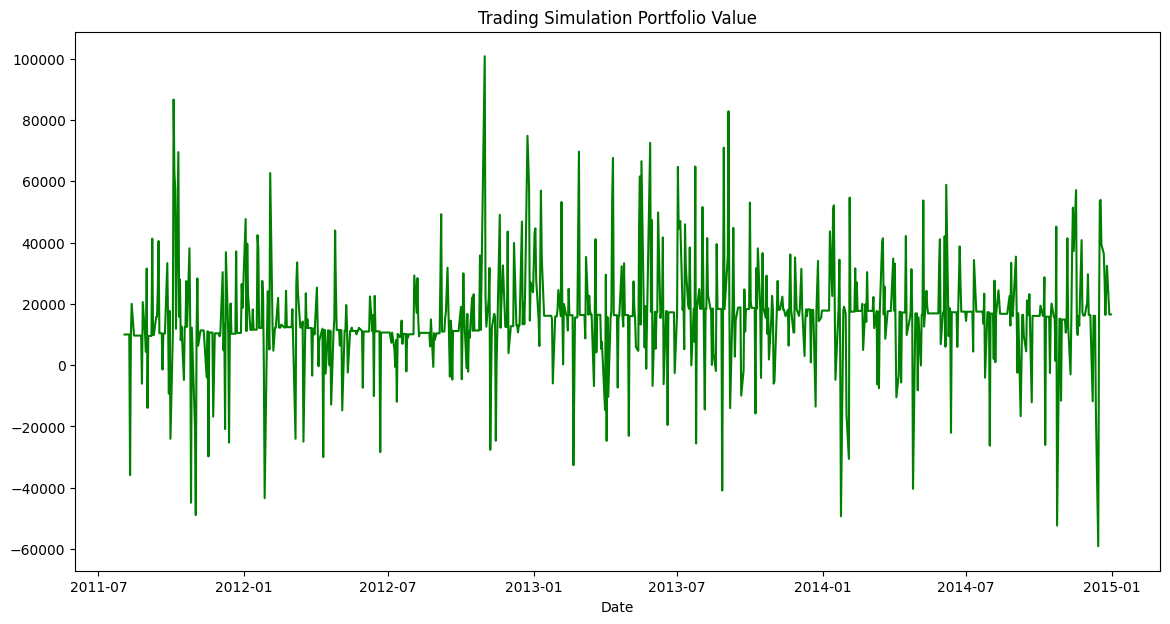

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


future_results['Date'] = pd.to_datetime(future_results['Date'])


future_results.set_index('Date', inplace=True)

# Parameters
initial_cash = 10000
cash = initial_cash
position = 0
buy_threshold = 0.1
sell_threshold = -0.1

# Create a DataFrame for simulation
simulation_results = pd.DataFrame(index=future_results.index)
simulation_results['Actual Returns'] = future_results['Actual Returns']
simulation_results['Predicted Returns'] = future_results['Predicted Returns']
simulation_results['Signal'] = 0  # 1 for buy, -1 for sell
simulation_results['Position'] = 0  # Shares held
simulation_results['Cash'] = cash
simulation_results['Portfolio Value'] = cash


cash = initial_cash
position = 0
buy_price = 0


for i in range(1, len(simulation_results)):
    # Check for Buy Signal
    if (simulation_results['Predicted Returns'].iloc[i] > buy_threshold and
        simulation_results['Predicted Returns'].iloc[i - 1] <= buy_threshold):
        if cash > 0:
            buy_price = future_data['Close'].iloc[i]
            position = cash / buy_price  # Buy as many shares as possible
            cash = 0
            simulation_results.at[simulation_results.index[i], 'Signal'] = 1
            simulation_results.at[simulation_results.index[i], 'Position'] = position
            simulation_results.at[simulation_results.index[i], 'Cash'] = cash
            print(f"Buy Signal: Bought shares at {buy_price} on {simulation_results.index[i]}")

    elif (simulation_results['Predicted Returns'].iloc[i] < sell_threshold and
          simulation_results['Predicted Returns'].iloc[i - 1] >= sell_threshold):
        if position > 0:
            sell_price = future_data['Close'].iloc[i]
            cash = position * sell_price  # Sell all shares
            position = 0
            simulation_results.at[simulation_results.index[i], 'Signal'] = -1
            simulation_results.at[simulation_results.index[i], 'Position'] = position
            simulation_results.at[simulation_results.index[i], 'Cash'] = cash
            print(f"Sell Signal: Sold shares at {sell_price} on {simulation_results.index[i]}")

    current_price = future_data['Close'].iloc[i]
    if position > 0:
        # If holding, adjust value by returns
        portfolio_value = cash + (position * current_price * (1 + simulation_results['Actual Returns'].iloc[i]))
    else:
        # If not holding, just add cash
        portfolio_value = cash

    simulation_results.at[simulation_results.index[i], 'Portfolio Value'] = portfolio_value

final_value = simulation_results['Portfolio Value'].iloc[-1]
profit = final_value - initial_cash
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Profit: ${profit:.2f}")


plt.figure(figsize=(14, 7))
plt.plot(simulation_results.index, simulation_results['Portfolio Value'], label='Portfolio Value', color='green')
plt.title('Trading Simulation Portfolio Value')
plt.xlabel('Date')